In [1]:
import sys
import pandas as pd
sys.path.append("..")
from lib.PLSA.plsa.algorithms import PLSA
from lib.PLSA.plsa import Corpus, Pipeline, Visualize
from lib.PLSA.plsa.pipeline import DEFAULT_PIPELINE

In [2]:
comment_df = pd.read_csv("..\data\cleaned_swed_lemma.csv",
                            lineterminator='\n')
comment_df.drop(index = [9, 1555, 2474, 2483, 4346, 7212], inplace = True)

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_sk = TfidfVectorizer(norm="l1")
#X = tf_idf_sk.fit_transform(comment_df.text)

AttributeError: 'DataFrame' object has no attribute 'text'

In [14]:
pipeline = Pipeline(lambda x: x)
corpus = Corpus.from_csv("..\data\cleaned_swed_lemma.csv", pipeline = pipeline, col = 4)
plsa_obj = PLSA(corpus, n_topics = 7, tf_idf = True)

In [15]:
plsa_obj.fit()

PlsaResult:
Number of topics:    7
Number of documents: 1000
Number of words:     100

In [16]:
result = plsa_obj.best_of(5)

In [17]:
visualize = Visualize(result)
visualize

Visualize:
Number of topics:    7
Number of documents: 1000
Number of words:     100

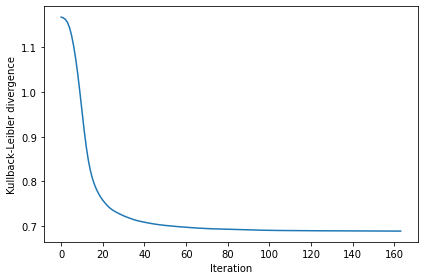

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
_ = visualize.convergence(ax)
fig.tight_layout()



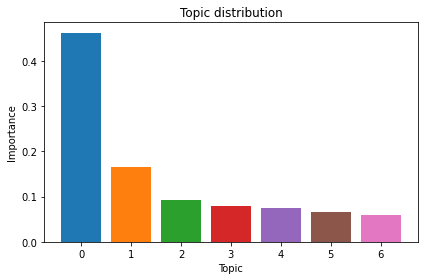

In [19]:
fig, ax = plt.subplots()
_ = visualize.topics(ax)
fig.tight_layout()

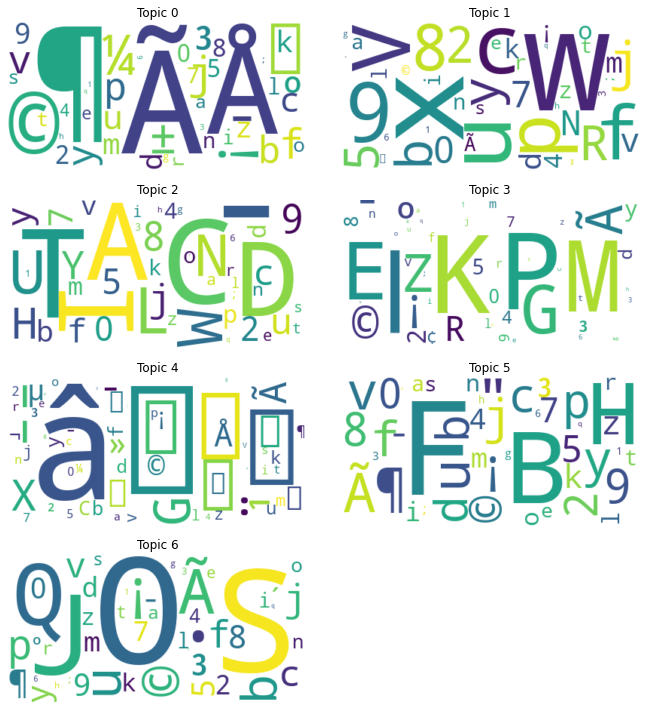

In [21]:
fig = plt.figure(figsize=(9.4, 10))
_ = visualize.wordclouds(fig)